Testing matrix size: 1x1
Matrix size 1x1: NumPy=0.0359s, TensorFlow=0.0936s, PyTorch=0.0355s
Testing matrix size: 2x2
Matrix size 2x2: NumPy=0.7208s, TensorFlow=0.1404s, PyTorch=0.8766s
Testing matrix size: 3x3
Matrix size 3x3: NumPy=2.1053s, TensorFlow=0.2868s, PyTorch=2.1873s
Testing matrix size: 4x4
Matrix size 4x4: NumPy=3.3379s, TensorFlow=0.5024s, PyTorch=3.5064s
Testing matrix size: 5x5
Matrix size 5x5: NumPy=5.2256s, TensorFlow=0.6460s, PyTorch=5.2459s
Testing matrix size: 6x6
Matrix size 6x6: NumPy=7.4541s, TensorFlow=0.8501s, PyTorch=7.5493s
Testing matrix size: 7x7
Matrix size 7x7: NumPy=9.9443s, TensorFlow=1.1008s, PyTorch=9.6907s
Testing matrix size: 8x8
Matrix size 8x8: NumPy=13.3624s, TensorFlow=1.3326s, PyTorch=13.1333s
Testing matrix size: 9x9
Matrix size 9x9: NumPy=16.6492s, TensorFlow=1.6285s, PyTorch=15.8402s
Testing matrix size: 10x10
Matrix size 10x10: NumPy=21.0068s, TensorFlow=2.2214s, PyTorch=19.8194s


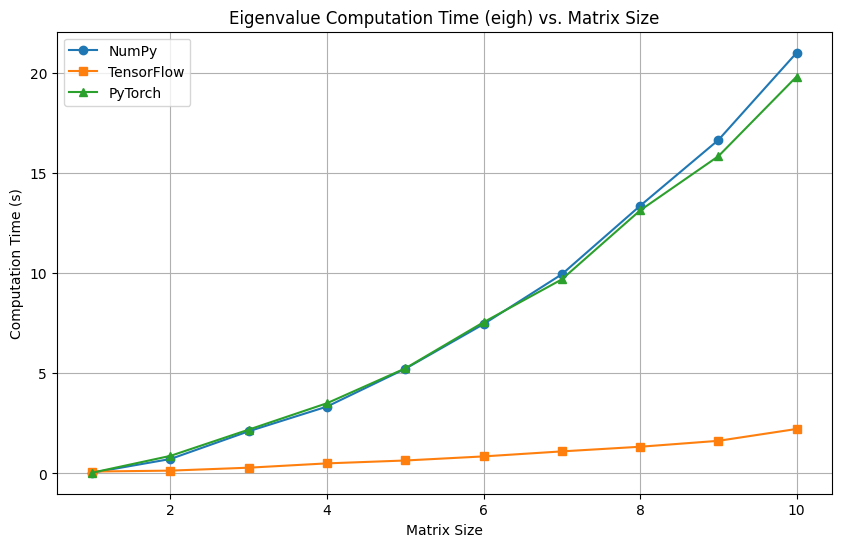

In [2]:
# Experiment on varying size 3D matrices (Numpy, PyTorch, and TensorFlow on CPU runtime)
import numpy as np
import tensorflow as tf
import torch
import time
import matplotlib.pyplot as plt

# Define smaller matrix sizes for testing
matrix_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize results storage
results = {"size": [], "numpy": [], "tensorflow": [], "pytorch": []}

# Run experiments for different matrix sizes
for size in matrix_sizes:
    print(f"Testing matrix size: {size}x{size}")
    
    # Generate random symmetric matrix
    matrix = np.random.rand(2985984, size, size)
    # matrix = (matrix + matrix.T) / 2  # Ensure symmetry

    # Convert to TensorFlow and PyTorch tensors
    matrix_tf = tf.convert_to_tensor(matrix, dtype=tf.float32)
    matrix_torch = torch.tensor(matrix, dtype=torch.float32)

    # Benchmark NumPy
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    numpy_time = time.time() - start_time

    # Benchmark TensorFlow
    start_time = time.time()
    eigenvalues, eigenvectors = tf.linalg.eigh(matrix_tf)
    tensorflow_time = time.time() - start_time

    # Benchmark PyTorch
    start_time = time.time()
    eigenvalues, eigenvectors = torch.linalg.eigh(matrix_torch)
    pytorch_time = time.time() - start_time

    # Store results
    results["size"].append(size)
    results["numpy"].append(numpy_time)
    results["tensorflow"].append(tensorflow_time)
    results["pytorch"].append(pytorch_time)

    print(f"Matrix size {size}x{size}: NumPy={numpy_time:.4f}s, TensorFlow={tensorflow_time:.4f}s, PyTorch={pytorch_time:.4f}s")

# Visualization of results
plt.figure(figsize=(10, 6))
plt.plot(results["size"], results["numpy"], label="NumPy", marker="o")
plt.plot(results["size"], results["tensorflow"], label="TensorFlow", marker="s")
plt.plot(results["size"], results["pytorch"], label="PyTorch", marker="^")
plt.xlabel("Matrix Size")
plt.ylabel("Computation Time (s)")
plt.title("Eigenvalue Computation Time (eigh) vs. Matrix Size")
plt.legend()
plt.grid()
plt.show()


In [14]:
# Experiment on Numpy for EVD's performance (computation time and memory usage)
import numpy as np
import tracemalloc
import time

# Function to measure memory usage with NumPy
def numpy_memory_test(matrix):
    tracemalloc.start()  # Start tracing memory allocation
    start_time = time.time()  # Start time
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)  # Eigenvalue computation
    end_time = time.time()  # End time
    current, peak = tracemalloc.get_traced_memory()  # Memory usage
    tracemalloc.stop()  # Stop tracing
    return end_time - start_time, current, peak

# Testing matrix sizes
matrix_sizes = [10, 100, 500, 1000, 2500, 5000]
results = {"size": [], "numpy": []}

# Run experiments
for size in matrix_sizes:
    print(f"Testing matrix size: {size}x{size}")
    matrix = np.random.rand(size, size)
    matrix = (matrix + matrix.T) / 2  # Ensure symmetry

    # NumPy memory and time measurement
    numpy_time, numpy_current, numpy_peak = numpy_memory_test(matrix)

    results["size"].append(size)
    results["numpy"].append((numpy_time, numpy_current, numpy_peak))

    print(f"Matrix size {size}x{size}:")
    print(f"  NumPy: Time={numpy_time:.4f}s, Current={numpy_current/1e6:.2f}MB, Peak={numpy_peak/1e6:.2f}MB")


Testing matrix size: 10x10
Matrix size 10x10:
  NumPy: Time=0.0003s, Current=0.30MB, Peak=0.39MB
Testing matrix size: 100x100
Matrix size 100x100:
  NumPy: Time=0.0401s, Current=0.08MB, Peak=0.08MB
Testing matrix size: 500x500
Matrix size 500x500:
  NumPy: Time=0.1155s, Current=2.00MB, Peak=2.00MB
Testing matrix size: 1000x1000
Matrix size 1000x1000:
  NumPy: Time=0.2465s, Current=8.01MB, Peak=8.01MB
Testing matrix size: 2500x2500
Matrix size 2500x2500:
  NumPy: Time=2.2127s, Current=50.02MB, Peak=50.02MB
Testing matrix size: 5000x5000
Matrix size 5000x5000:
  NumPy: Time=13.4644s, Current=200.04MB, Peak=200.04MB
